In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import data_utils as t
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../data/1406_2522_compressed_survey_results_public.csv')
schema = pd.read_csv('../data/datasets_1406_2522_survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [21]:
cous_ed_vals = df.CousinEducation.value_counts()#Provide a pandas series of the counts for each CousinEducation status

cous_ed_vals # assure this looks right

Take online courses; Buy books and work through the exercises                                                  711
Take online courses                                                                                            551
None of these                                                                                                  523
Take online courses; Part-time/evening courses; Buy books and work through the exercises                       479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises             465
                                                                                                              ... 
Bootcamp; Part-time/evening courses; Participate in hackathons; Other                                            1
Master's degree; Bootcamp; Participate in hackathons; Participate in online coding competitions                  1
Master's degree; Participate in hackathons; Participate in online coding competi

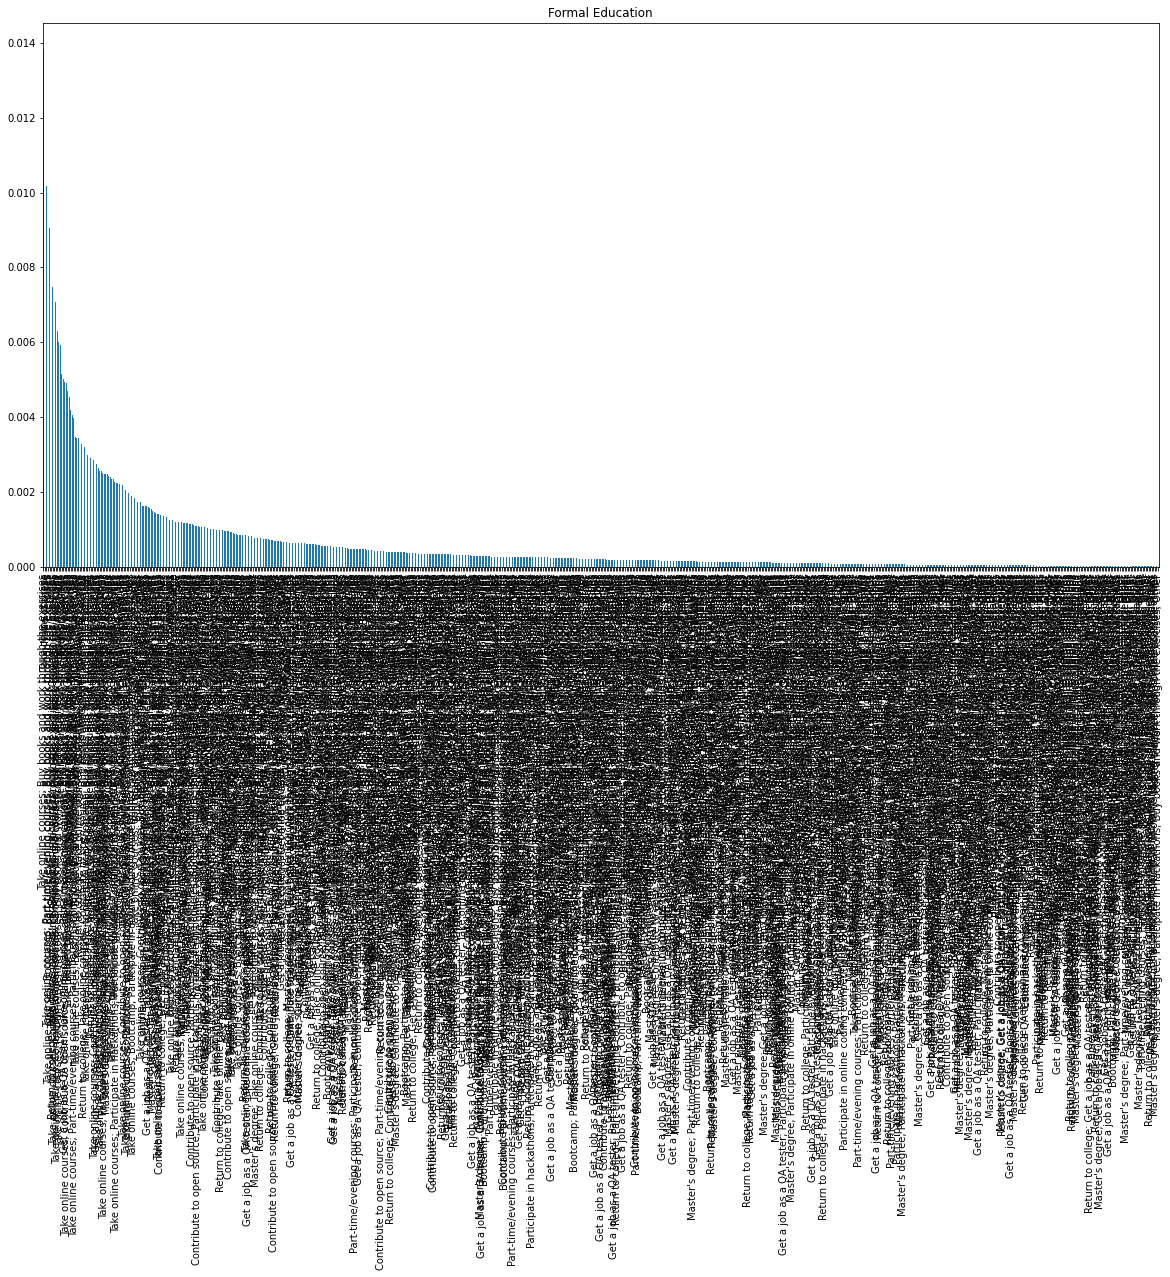

In [22]:
# The below should be a bar chart of the proportion of individuals in your ed_vals
# if it is set up correctly.

(cous_ed_vals/df.shape[0]).plot(kind="bar",figsize=(20,10));
plt.title("Formal Education");

In [23]:
higher_ed = df.HigherEd.va 
(cous_ed_vals/df.shape[0]).plot(kind="bar",figsize=(20,10));
plt.title("Formal Education");

AttributeError: 'DataFrame' object has no attribute 'HigherEd'

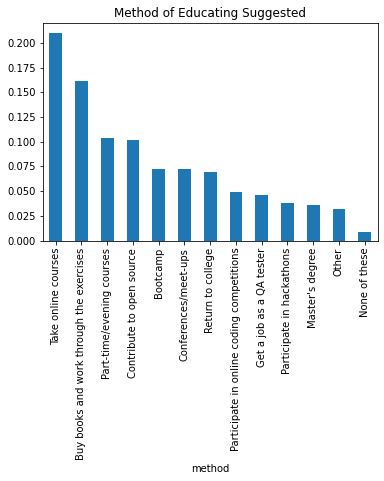

In [24]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

In [25]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"):
        return 1
    else:
        return 0
    

df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    0
2    0
3    0
4    1
Name: FormalEducation, dtype: int64

In [26]:
# Check your code here
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
higher_ed_perc

0.23069738480697385

In [27]:
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0


print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

4     1
6     1
7     1
9     1
14    1
Name: HigherEd, dtype: int64
0    0
1    0
2    0
3    0
5    0
Name: HigherEd, dtype: int64


In [28]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
method,,,
Take online courses,0.207892,0.209900,-0.002009
Buy books and work through the exercises,0.162073,0.161205,0.000868
Part-time/evening courses,0.103298,0.103248,0.000050
Contribute to open source,0.097821,0.103230,-0.005409
Bootcamp,0.074617,0.071824,0.002793
Return to college,0.068728,0.068975,-0.000247
Conferences/meet-ups,0.065842,0.073920,-0.008078
Master's degree,0.058952,0.029346,0.029606
Get a job as a QA tester,0.048469,0.045739,0.002730


In [29]:
ed_1_perc

,count
method,
Take online courses,0.207892
Buy books and work through the exercises,0.162073
Part-time/evening courses,0.103298
Contribute to open source,0.097821
Bootcamp,0.074617
Return to college,0.068728
Conferences/meet-ups,0.065842
Master's degree,0.058952
Get a job as a QA tester,0.048469


In [30]:
ed_0_perc

,count
method,
Take online courses,0.209900
Buy books and work through the exercises,0.161205
Part-time/evening courses,0.103248
Contribute to open source,0.103230
Conferences/meet-ups,0.073920
Bootcamp,0.071824
Return to college,0.068975
Participate in online coding competitions,0.050881
Get a job as a QA tester,0.045739


In [31]:
df['CousinEducation']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
51387    Take online courses; Part-time/evening courses...
51388    Take online courses; Bootcamp; Part-time/eveni...
51389                            Contribute to open source
51390                                                  NaN
51391    Return to college; Take online courses; Part-t...
Name: CousinEducation, Length: 51392, dtype: object